# Working with SeismicDataset
Seismic dataset contains functions that calculate some parameters for the dataset.
## Content
* [Loading data](#Loading-data)
* [Find parameters for spherical divergence correction](#Find-parameters-for-spherical-divergence-correction)

## Loading data
This function load one element with given index from dataset.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')

from seismicpro.batchflow import Pipeline, V, D
from seismicpro.src import (SeismicBatch, FieldIndex, seismic_plot,
                            gain_plot, calculate_sdc_quality,
                            measure_gain_amplitude, SeismicDataset)
from seismicpro.models import calc_derivative_diff

First of all we have to create an index.

In [2]:
path_raw = '/notebooks/anton/sphere_difference/2_TAR_raw.sgy'

field_index = FieldIndex(name='raw', extra_headers=['offset'], path=path_raw)

Based on indexd and dataset one can create a dataset instance.

In [3]:
dataset = SeismicDataset(field_index, SeismicBatch)

To load one element form dataset use ```load_batch``` function. First argument is an index of element to load and second one is batch component from which this data will be loaded.

In [4]:
raw, samples = dataset.load_batch(index=dataset.indices[0], src='raw')

Let's draw received raw field.

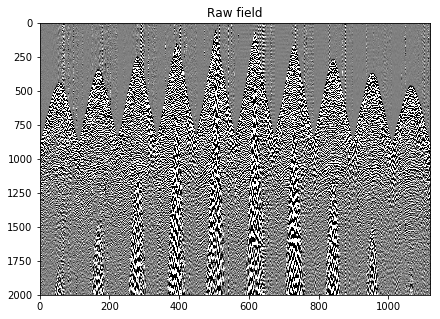

In [5]:
cv = 0.1
seismic_plot(raw, figsize=(7, 5), vmin=-cv, vmax=cv,
             cmap='gray', names='Raw field')

And let's ahve a look on the samples.

In [6]:
print('Loaded samples: ', samples[:5])

Loaded samples:  [0. 2. 4. 6. 8.]


## Find parameters for spherical divergence correction
Spherical divergence correction action from ```SeismicBatch``` takes parameters based on which correction will be made. These parameters could be found for all dataset by dataset's function named ```find_correctoin_parameters```. The function uses speed, time and loss function to find optimal parameters for spherical divergence correction. In this example, speed was calculated by a specialist.

In [7]:
speed = np.array([1524]*700 + [1924.5]*300 + [2184.0]*400 +  [2339.6]*400 + 
                 [2676]*150 + [2889.5]*2250 + [3566]*2800 + [4785.3]*1000)

Following line run optimization process. This process works with scipy optimization, so you can specify any parameters from ```scipy.optimize.minimize```. The optimization process takes a lot of time, this why it's calculated once for all dataset.

In [8]:
parameters = dataset.find_correctoin_parameters(src='raw', speed=speed,
                                                loss=calculate_sdc_quality)

Founded parameters will be saved to the variable named ```parameters``` and simultaneously these parameters saved to dataset's attribute ```correction_params```.

In [9]:
print('Optimal parameters for v_pow is {:.3}, for t_pow is {:.3}.'.format(*parameters))

Optimal parameters for v_pow is 2.06, for t_pow is 0.998.


In [10]:
print('Optimal parameters for v_pow is {:.3}, for t_pow is {:.3} from correction_params.'.format(*dataset.correction_params))

Optimal parameters for v_pow is 2.06, for t_pow is 0.998 from correction_params.


More frequently this function will be used to calculate parameters once before main preprocessing pipeline. An example how to use ```pipeline.before``` to find  parameters for spherical divergence correction shown in [model_description](../models/Spherical_divergence_correction/model_description.ipynb).